In [129]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [130]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [131]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [132]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    N = y.shape[0]
    
    e = y - np.matmul(tx, w)
    
    return 1.0 / (2*N) * np.sum( e ** 2 )

# 2 Grid Search

Fill in the function `grid_search()` below:

In [133]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    
    for i in range(len(w0)):
        for j in range(len(w1)):
            w = np.array( [w0[i], w1[j]] )
            losses[i,j] = compute_loss(y, tx, w)
            
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=42.4244831468, w0*=66.6666666667, w1*=16.6666666667, execution time=0.016 seconds


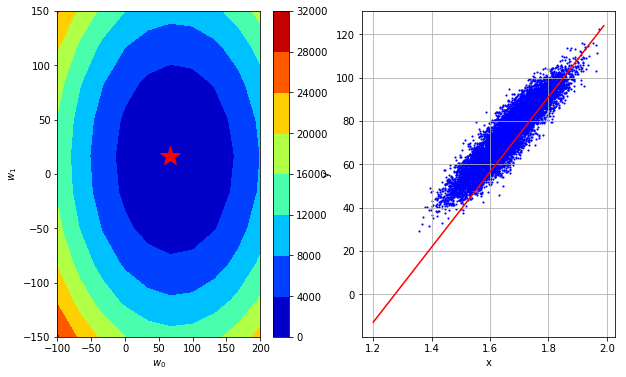

In [134]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [135]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    N = y.shape[0]
    
    e = y - np.matmul(tx, w)
    
    return - 1.0/N * np.matmul( tx.T, e )

Please fill in the functions `gradient_descent` below:

In [136]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        gradient = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        
        print(loss)
        
        w = w - gamma * gradient
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [137]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

2792.2367127591674
Gradient Descent(0/49): loss=2792.23671276, w0=51.3057454015, w1=9.43579870449
265.3024621089606
Gradient Descent(1/49): loss=265.302462109, w0=66.6974690219, w1=12.2665383158
37.87837955044127
Gradient Descent(2/49): loss=37.8783795504, w0=71.314986108, w1=13.1157601992
17.41021212017447
Gradient Descent(3/49): loss=17.4102121202, w0=72.7002412339, w1=13.3705267643
15.568077051450459
Gradient Descent(4/49): loss=15.5680770515, w0=73.1158177716, w1=13.4469567338
15.402284895265295
Gradient Descent(5/49): loss=15.4022848953, w0=73.240490733, w1=13.4698857246
15.38736360120863
Gradient Descent(6/49): loss=15.3873636012, w0=73.2778926214, w1=13.4767644219
15.386020684743531
Gradient Descent(7/49): loss=15.3860206847, w0=73.2891131879, w1=13.4788280311
15.385899822261674
Gradient Descent(8/49): loss=15.3858998223, w0=73.2924793578, w1=13.4794471138
15.385888944638307
Gradient Descent(9/49): loss=15.3858889446, w0=73.2934892088, w1=13.4796328386
15.385887965652202
Gradien

In [138]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0xLCBkZXNjcmlwdGlvbj11J25faXRlcicsIG1heD01MSwgbWluPTEpLCBPdXRwdXQoKSksIF9kb21fY2xhc3Nlcz0odSd3aWTigKY=


<function __main__.plot_figure>

# 4 Stochastic gradient descent

In [139]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    N = y.shape[0]
    
    e = y - np.matmul(tx, w)
    
    return - 1.0/N * np.matmul( tx.T, e )

def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            gradient = compute_stoch_gradient(minibatch_y, minibatch_tx, w)
            loss = compute_loss(minibatch_y, minibatch_tx, w)

            w = w - gamma * gradient

            # store w and loss
            ws.append(w)
            losses.append(loss)
            print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
                  bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [140]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=3449.77118709, w0=58.1444387998, w1=16.4900803979
Gradient Descent(1/49): loss=21.1087999222, w0=62.6926938415, w1=19.1004052313
Gradient Descent(2/49): loss=48.3005260108, w0=69.5727022347, w1=16.196431998
Gradient Descent(3/49): loss=0.807035179426, w0=70.462024716, w1=15.5893186015
Gradient Descent(4/49): loss=4.96065402496, w0=72.6668922731, w1=17.4445626642
Gradient Descent(5/49): loss=15.9989428639, w0=68.7072251146, w1=18.4929554022
Gradient Descent(6/49): loss=170.149337038, w0=81.6202553669, w1=-11.0926760178
Gradient Descent(7/49): loss=12.4275223169, w0=85.11009374, w1=-11.1666092151
Gradient Descent(8/49): loss=616.554235027, w0=60.5291427754, w1=6.02987640184
Gradient Descent(9/49): loss=75.0246639544, w0=69.1037664216, w1=8.01910424235
Gradient Descent(10/49): loss=0.0591571777424, w0=68.8629884447, w1=8.06219571908
Gradient Descent(11/49): loss=25.3117407138, w0=73.8435010588, w1=4.98468764984
Gradient Descent(12/49): loss=9.49718609162, w0=7

In [141]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0xLCBkZXNjcmlwdGlvbj11J25faXRlcicsIG1heD01MSwgbWluPTEpLCBPdXRwdXQoKSksIF9kb21fY2xhc3Nlcz0odSd3aWTigKY=


<function __main__.plot_figure>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

In [142]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)

2869.8351145358524
Gradient Descent(0/49): loss=2869.83511454, w0=51.8474640984, w1=7.72442640619
318.282124701595
Gradient Descent(1/49): loss=318.282124702, w0=67.401703328, w1=10.0417543281
88.6423556165126
Gradient Descent(2/49): loss=88.6423556165, w0=72.0679750968, w1=10.7369527046
67.97477639885521
Gradient Descent(3/49): loss=67.9747763989, w0=73.4678566275, w1=10.9455122176
66.11469426926604
Gradient Descent(4/49): loss=66.1146942693, w0=73.8878210867, w1=11.0080800715
65.94728687760302
Gradient Descent(5/49): loss=65.9472868776, w0=74.0138104245, w1=11.0268504276
65.93222021235334
Gradient Descent(6/49): loss=65.9322202124, w0=74.0516072258, w1=11.0324815345
65.93086421248087
Gradient Descent(7/49): loss=65.9308642125, w0=74.0629462662, w1=11.0341708665
65.93074217249236
Gradient Descent(8/49): loss=65.9307421725, w0=74.0663479783, w1=11.0346776662
65.93073118889338
Gradient Descent(9/49): loss=65.9307311889, w0=74.0673684919, w1=11.034829706
65.93073020036948
Gradient Descen

In [143]:
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0xLCBkZXNjcmlwdGlvbj11J25faXRlcicsIG1heD01MSwgbWluPTEpLCBPdXRwdXQoKSksIF9kb21fY2xhc3Nlcz0odSd3aWTigKY=


<function __main__.plot_figure>

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)